# Download datasets

In [36]:
%env DATASETS_DIR=datasets
%env UCI_DATASET=uci
%env OUR_DATASET=our

env: DATASETS_DIR=datasets
env: UCI_DATASET=uci
env: OUR_DATASET=our


In [54]:
!mkdir -p ${DATASETS_DIR}
!mkdir -p ${DATASETS_DIR}/${UCI_DATASET}
!mkdir -p ${DATASETS_DIR}/${OUR_DATASET}

In [2]:
!wget -O ${DATASETS_DIR}/${UCI_DATASET}.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00344/Activity%20recognition%20exp.zip

--2020-12-21 12:25:02--  https://archive.ics.uci.edu/ml/machine-learning-databases/00344/Activity%20recognition%20exp.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 777127275 (741M) [application/x-httpd-php]
Saving to: ‘data/activity-recognition-dataset.zip’

data/activity-recog 100%[===================>] 741.13M  1.72MB/s    in 7m 37s  

2020-12-21 12:32:40 (1.62 MB/s) - ‘data/activity-recognition-dataset.zip’ saved [777127275/777127275]



In [38]:
!unzip -j -d ${DATASETS_DIR}/${UCI_DATASET} ${DATASETS_DIR}/${UCI_DATASET}.zip

Archive:  datasets/uci.zip
  inflating: datasets/uci/.DS_Store  
  inflating: datasets/uci/._.DS_Store  
  inflating: datasets/uci/Phones_accelerometer.csv  
  inflating: datasets/uci/Phones_gyroscope.csv  
  inflating: datasets/uci/readme.txt  
  inflating: datasets/uci/._readme.txt  
  inflating: datasets/uci/Watch_accelerometer.csv  
  inflating: datasets/uci/Watch_gyroscope.csv  


In [39]:
!fold -w 80 -s ${DATASETS_DIR}/${UCI_DATASET}/readme.txt | cat

This is a documentation for the Heterogeneity Dataset for Human Activity 
Recognition (HHAR) from Smartphones and Smartwatches from the public 
repository: 
https://archive.ics.uci.edu/ml/datasets/Heterogeneity+Activity+Recognition+Data+
Set or the personal Website: http://cs.au.dk/~allans/heterogenity/.
The Heterogeneity Dataset for Human Activity Recognition from Smartphone and 
Smartwatches is a dataset devised to benchmark human activity recognition 
algorithms (classification, automatic data segmentation, sensor fusion, feature 
The files in this archive contain all the samples from the activity recognition 
The dataset contains the readings of two motion sensors commonly found in 
smartphones' recorded while users executed activities scripted in no specific 
The data is split into 4 files in total divided by device (phone or watch) and 
sensor (gyroscope and accelerometer). The files for phones are: 
Phones_accelerometer.csv, Phones_gyroscope.csv for the accelerometer and 
gyrosc

# Programmatically load dataset in Python


In [40]:
from typing import Dict

In [41]:
import os
import pandas as pd

def load_datasets(path: str, subset: str = "phones"):
    """
    Load dataset csvs from `path` and return them in a dict.

    :param path: The dataset path
    :param subset: The dataset subset to load, can be one of "phones", "watches", "all",

    :return: A dict with `phones_accelerometer`, `phones_gyroscope`, 
        `watch_accelerometer`, `watch_gyroscope`
    """

    phones_accelerometer = None
    phones_gyroscopem = None
    watch_accelerometer = None
    watch_gyroscope = None

    if subset in ["phones", "all"]:
        phones_accelerometer = pd.read_csv(os.path.join(path, "Phones_accelerometer.csv"))
        phones_gyroscope = pd.read_csv(os.path.join(path, "Phones_gyroscope.csv"))
    
    if subset in ["watch", "all"]:
        watch_accelerometer = pd.read_csv(os.path.join(path, "Watch_accelerometer.csv"))
        watch_gyroscope = pd.read_csv(os.path.join(path, "Watch_gyroscope.csv"))
    
    dataset = { 
        "phones_accelerometer" : phones_accelerometer, 
        "phones_gyroscope": phones_gyroscope,
        "watch_accelerometer": watch_accelerometer,
        "watch_gyroscope": watch_gyroscope
    }

    return dataset

In [42]:
def get_dataset(ds: Dict[str, pd.DataFrame], subset: str = "all"):
    """
    :param ds: Dataset dict
    :param type: One of `all`, `phones`, `watches`, `accelerometer`, `gyroscope`
    :return: A tuple with dataframe, one for each dataset
    """

    if subset == "phones":
        return ds["phones_accelerometer"], ds["phones_gyroscope"]

    if subset == "watches":
        return ds["watch_accelerometer"], ds["watch_gyroscope"]

    if subset == "accelerometer":
        return ds["phones_accelerometer"], ds["watch_accelerometer"]

    if subset == "gyroscope":
        return ds["phones_gyroscope"], ds["watch_gyroscope"]

    return ds["phones_accelerometer"], ds["phones_gyroscope"], ds["watch_accelerometer"], ds["watch_gyroscope"]

In [49]:
uci_dataset_path = "./datasets/uci"

In [44]:
datasets = load_datasets(uci_dataset_path, subset="phones")
phones_accelerometer, phones_gyroscope = get_dataset(datasets, subset="phones")

print(phones_accelerometer.head())
print(phones_accelerometer.columns)

   Index   Arrival_Time        Creation_Time         x         y         z  \
0      0  1424696633908  1424696631913248572 -5.958191  0.688065  8.135345   
1      1  1424696633909  1424696631918283972 -5.952240  0.670212  8.136536   
2      2  1424696633918  1424696631923288855 -5.995087  0.653549  8.204376   
3      3  1424696633919  1424696631928385290 -5.942718  0.676163  8.128204   
4      4  1424696633929  1424696631933420691 -5.991516  0.641647  8.135345   

  User   Model    Device     gt  
0    a  nexus4  nexus4_1  stand  
1    a  nexus4  nexus4_1  stand  
2    a  nexus4  nexus4_1  stand  
3    a  nexus4  nexus4_1  stand  
4    a  nexus4  nexus4_1  stand  
Index(['Index', 'Arrival_Time', 'Creation_Time', 'x', 'y', 'z', 'User',
       'Model', 'Device', 'gt'],
      dtype='object')


In [45]:
def print_stats(df: pd.DataFrame):
    rows_no = df.shape[0]
    nulls_no = df['gt'].isnull().sum()

    print("Columns =", pd.unique(df['gt']))
    print("Number rows =", rows_no)
    print("Number of null values in gt =", nulls_no)
    print("Null rateo =", nulls_no / rows_no)

In [46]:
print_stats(phones_accelerometer)
print_stats(phones_gyroscope)

print(phones_accelerometer)

Columns = ['stand' nan 'sit' 'walk' 'stairsup' 'stairsdown' 'bike']
Number rows = 13062475
Number of null values in gt = 1783200
Null rateo = 0.13651317992953096
Columns = ['stand' nan 'sit' 'walk' 'stairsup' 'stairsdown' 'bike']
Number rows = 13932632
Number of null values in gt = 1869627
Null rateo = 0.13419051045057387
           Index   Arrival_Time        Creation_Time         x         y  \
0              0  1424696633908  1424696631913248572 -5.958191  0.688065   
1              1  1424696633909  1424696631918283972 -5.952240  0.670212   
2              2  1424696633918  1424696631923288855 -5.995087  0.653549   
3              3  1424696633919  1424696631928385290 -5.942718  0.676163   
4              4  1424696633929  1424696631933420691 -5.991516  0.641647   
...          ...            ...                  ...       ...       ...   
13062470  129048  1424778553315       92263781761000  1.379043  0.153227   
13062471  129049  1424778553346       92263812248000  1.379043  0.15

In [47]:
acc_data, gyro_data = phones_accelerometer.dropna(subset=['gt']), phones_gyroscope.dropna(subset=['gt'])

print(acc_data)
print(gyro_data)

           Index   Arrival_Time        Creation_Time         x         y  \
0              0  1424696633908  1424696631913248572 -5.958191  0.688065   
1              1  1424696633909  1424696631918283972 -5.952240  0.670212   
2              2  1424696633918  1424696631923288855 -5.995087  0.653549   
3              3  1424696633919  1424696631928385290 -5.942718  0.676163   
4              4  1424696633929  1424696631933420691 -5.991516  0.641647   
...          ...            ...                  ...       ...       ...   
13062470  129048  1424778553315       92263781761000  1.379043  0.153227   
13062471  129049  1424778553346       92263812248000  1.379043  0.153227   
13062472  129050  1424778553366       92263832267000  1.532270  0.153227   
13062473  129051  1424778553386       92263852409000  1.532270  0.000000   
13062474  129052  1424778553395       92263861839000  1.379043  0.000000   

                 z User       Model        Device     gt  
0         8.135345    a     

In [51]:
our_dataset_path = "./datasets/our"

In [55]:
acc_data.to_hdf(os.path.join(our_dataset_path, "acc_data.h5"), key="acc_data", mode="w")
gyro_data.to_hdf(os.path.join(our_dataset_path, "gyro_data.h5"), key="gyro_data", mode="w")

# LOAD DATASET & DATASET PREPROCESSING

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# LOAD entire csv examples 
acc_data = pd.read_csv('./acc_data.csv')
gyro_data = pd.read_csv('./gyro_data.csv')

print(acc_data)
print(gyro_data)


          Unnamed: 0   Index   Arrival_Time        Creation_Time         x  \
0                  0       0  1424696633908  1424696631913248572 -5.958191   
1                  1       1  1424696633909  1424696631918283972 -5.952240   
2                  2       2  1424696633918  1424696631923288855 -5.995087   
3                  3       3  1424696633919  1424696631928385290 -5.942718   
4                  4       4  1424696633929  1424696631933420691 -5.991516   
...              ...     ...            ...                  ...       ...   
11279270    13062470  129048  1424778553315       92263781761000  1.379043   
11279271    13062471  129049  1424778553346       92263812248000  1.379043   
11279272    13062472  129050  1424778553366       92263832267000  1.532270   
11279273    13062473  129051  1424778553386       92263852409000  1.532270   
11279274    13062474  129052  1424778553395       92263861839000  1.379043   

                 y         z User       Model        Device    

In [27]:
users = acc_data['User'].unique()
devices = acc_data['Device'].unique()
activities = acc_data['gt'].unique()

print(users)
print(devices)
print(activities)



['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i']
['nexus4_1' 'nexus4_2' 's3_1' 's3_2' 's3mini_1' 's3mini_2' 'samsungold_1'
 'samsungold_2']
['stand' 'sit' 'walk' 'stairsup' 'stairsdown' 'bike']


In [28]:


acc_df_example = acc_data.loc[(acc_data['User'] == users[0]) & (acc_data['Device'] == devices[0]) & (acc_data['gt'] == activities[0])]
gyro_df_example = gyro_data.loc[(gyro_data['User'] == users[0]) & (gyro_data['Device'] == devices[0]) & (gyro_data['gt'] == activities[0])]


# FORMAT CORRECTLY CREATION_TIME COLUMN
acc_df_example['Creation_Time'] = acc_df_example['Creation_Time'].apply(lambda x: str(math.trunc(x / 1000000)))
gyro_df_example['Creation_Time'] = gyro_df_example['Creation_Time'].apply(lambda x: str(math.trunc(x / 1000000)))

print(f'Acc Data for user {users[0]} with device {devices[1]} in acitivty {activities [0]}: \n {acc_df_example}')
print(f'Gyro Data for user {users[0]} with device {devices[1]} in acitivty {activities [0]}: \n {gyro_df_example}')

Acc Data for user a with device nexus4_2 in acitivty stand: 
        Unnamed: 0  Index   Arrival_Time  Creation_Time         x         y  \
0               0      0  1424696633908  1424696631913 -5.958191  0.688065   
1               1      1  1424696633909  1424696631918 -5.952240  0.670212   
2               2      2  1424696633918  1424696631923 -5.995087  0.653549   
3               3      3  1424696633919  1424696631928 -5.942718  0.676163   
4               4      4  1424696633929  1424696631933 -5.991516  0.641647   
...           ...    ...            ...            ...       ...       ...   
55158       55158  55158  1424696932012  1424696930020 -6.220032  0.088211   
55159       55159  55159  1424696932017  1424696930025 -6.122437  0.087021   
55160       55160  55160  1424696932022  1424696930030 -6.170044  0.084640   
55161       55161  55161  1424696932034  1424696930035 -6.147430  0.081070   
55162       55162  55162  1424696932036  1424696930040 -6.151001  0.070358   

 

# TRY WITH INTERPOLATION

In [29]:
# ACQURING ONE CORRECT EXAMPLE
acc_df_example = acc_data.loc[(acc_data['User'] == 'b') & (acc_data['Device'] == 'nexus4_2') & (acc_data['gt'] == 'walk')]
gyro_df_example = gyro_data.loc[(gyro_data['User'] == 'b') & (gyro_data['Device'] == 'nexus4_2') & (gyro_data['gt'] == 'walk')]

# FORMAT CORRECTLY CREATION_TIME COLUMN
acc_df_example['Creation_Time'] = acc_df_example['Creation_Time'].apply(lambda x: int(math.trunc(x / 1000000)))
gyro_df_example['Creation_Time'] = gyro_df_example['Creation_Time'].apply(lambda x: int(math.trunc(x / 1000000)))

print(acc_df_example)
print(gyro_df_example)

         Unnamed: 0   Index   Arrival_Time  Creation_Time         x         y  \
1610414     1824469   98679  1424785393146  1424787238453 -5.804489 -1.577606   
1610415     1824470   98680  1424785393146  1424787238458 -6.434097 -2.828491   
1610416     1824471   98681  1424785393147  1424787238463 -6.948257 -3.938934   
1610417     1824472   98682  1424785393157  1424787238468 -6.565018 -4.697082   
1610418     1824473   98683  1424785393158  1424787238474 -5.802109 -5.054138   
...             ...     ...            ...            ...       ...       ...   
1675697     1889752  163962  1424785722407  1424787567723 -1.252029 -0.133911   
1675698     1889753  163963  1424785722413  1424787567728 -1.204422 -0.179138   
1675699     1889754  163964  1424785722416  1424787567733 -1.149674 -0.225555   
1675700     1889755  163965  1424785722422  1424787567738 -1.065170 -0.183899   
1675701     1889756  163966  1424785722427  1424787567743 -0.921158 -0.108917   

                 z User   M

         Unnamed: 0   Index   Arrival_Time  Creation_Time         x         y  \
1610414     1824469   98679  1424785393146  1424787238453 -5.804489 -1.577606   
1610415     1824470   98680  1424785393146  1424787238458 -6.434097 -2.828491   
1610416     1824471   98681  1424785393147  1424787238463 -6.948257 -3.938934   
1610417     1824472   98682  1424785393157  1424787238468 -6.565018 -4.697082   
1610418     1824473   98683  1424785393158  1424787238474 -5.802109 -5.054138   
...             ...     ...            ...            ...       ...       ...   
1675697     1889752  163962  1424785722407  1424787567723 -1.252029 -0.133911   
1675698     1889753  163963  1424785722413  1424787567728 -1.204422 -0.179138   
1675699     1889754  163964  1424785722416  1424787567733 -1.149674 -0.225555   
1675700     1889755  163965  1424785722422  1424787567738 -1.065170 -0.183899   
1675701     1889756  163966  1424785722427  1424787567743 -0.921158 -0.108917   

                 z User   M

<Figure size 432x288 with 0 Axes>

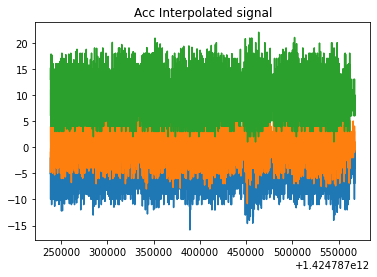

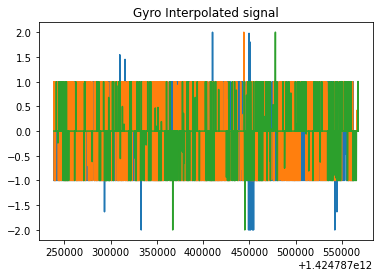

<Figure size 432x288 with 0 Axes>

In [31]:


def retrive_correct_min_max_timestamp(acc_data, gyro_data):
    min_acc_timestamp = acc_data['Creation_Time'].iloc[0]
    min_gyro_timestamp = gyro_data['Creation_Time'].iloc[0]
    max_acc_timestamp = acc_data['Creation_Time'].iloc[-1]
    max_gyro_timestamp = gyro_data['Creation_Time'].iloc[-1]

    min_timestamp = np.min(np.array([min_acc_timestamp, min_gyro_timestamp]).astype(int))
    max_timestamp = np.max(np.array([max_acc_timestamp, max_gyro_timestamp]).astype(int))

    return (min_timestamp, max_timestamp)

def get_interpolated_data(acc_data, gyro_data, samples_frequency):
    min_creation_time, max_creation_time = retrive_correct_min_max_timestamp(acc_df_example, gyro_df_example)
    
    time_seconds_interval = ((max_creation_time - min_creation_time) / 1000)

    n_samples=int(math.trunc(time_seconds_interval * samples_frequency))

    time_interpolation = np.linspace(min_creation_time, max_creation_time, num=n_samples)
    acc_timestamp = np.array(acc_df_example['Creation_Time']).astype(int)
    x_acc = np.array(acc_df_example['x']).astype(int)
    y_acc = np.array(acc_df_example['y']).astype(int)
    z_acc = np.array(acc_df_example['z']).astype(int)
    x_interpolated_acc = np.interp(time_interpolation, acc_timestamp, x_acc)
    y_interpolated_acc = np.interp(time_interpolation, acc_timestamp, y_acc)
    z_interpolated_acc = np.interp(time_interpolation, acc_timestamp, z_acc)

    interpolated_acc = np.vstack((x_interpolated_acc, y_interpolated_acc, z_interpolated_acc))

    gyro_timestamp = np.array(gyro_df_example['Creation_Time']).astype(int)
    x_gyro = np.array(gyro_df_example['x']).astype(int)
    y_gyro = np.array(gyro_df_example['y']).astype(int)
    z_gyro = np.array(gyro_df_example['z']).astype(int)

    x_interpolated_gyro = np.interp(time_interpolation, gyro_timestamp, x_gyro)
    y_interpolated_gyro = np.interp(time_interpolation, gyro_timestamp, y_gyro)
    z_interpolated_gyro = np.interp(time_interpolation, gyro_timestamp, z_gyro)

    interpolated_gyro = np.vstack((x_interpolated_gyro, y_interpolated_gyro, z_interpolated_gyro))

    return interpolated_acc, interpolated_gyro, time_interpolation


print(acc_df_example)


interpolated_acc, interpolated_gyro, time_interpolation = get_interpolated_data(acc_df_example, gyro_df_example, samples_frequency=50)


plt.plot(time_interpolation, interpolated_acc.T)
plt.title('Acc Interpolated signal')
plt.figure()


plt.plot(time_interpolation, interpolated_gyro.T)
plt.title('Gyro Interpolated signal')
plt.figure()

130
(3, 125)


<Figure size 432x288 with 0 Axes>

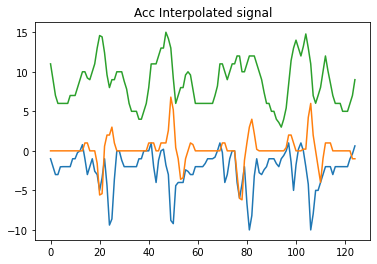

<Figure size 432x288 with 0 Axes>

In [32]:
#TRYING TIME WINDOW

#TODO IMPLEMENT ALSO OVERLAPPING TIMEWINDOWS
def generate_time_windows(acc_data, gyro_data, sampling_frequency, seconds_in_time_window):
    n_samples = acc_data.shape[1]
 
    samples_in_time_window = int(seconds_in_time_window * sampling_frequency)

    number_of_time_windows = int(np.floor(n_samples / samples_in_time_window))

    extracted_acc_time_windows = []
    extracted_gyro_time_windows = []

    for i in range(0, number_of_time_windows-1):
        # EXTRACTING TIME WINDOW
        start_index = i*samples_in_time_window
        final_index = (i+1)*samples_in_time_window

        extracted_acc_samples = acc_data[:, start_index:final_index]
        extracted_gyro_samples = gyro_data[:, start_index:final_index]

        extracted_acc_time_windows.append(extracted_acc_samples)
        extracted_gyro_time_windows.append(extracted_gyro_samples)

    return extracted_acc_time_windows, extracted_gyro_time_windows

extracted_acc_time_windows, extracted_gyro_time_windows = generate_time_windows(interpolated_acc, interpolated_gyro, 50, 2.5)
print(len(extracted_acc_time_windows))
print(extracted_acc_time_windows[0].shape)

plt.plot(extracted_acc_time_windows[25].T)
plt.title('Acc Interpolated signal')
plt.figure()



In [33]:
# CHECK AND BUILD OUR DATASET FOR THEIR BUGS

samples_frequency_we_want = 50
time_window_seconds = 2.5

#creating file 
f_dataset = open(f"./dataset.txt_{samples_frequency_we_want}_{time_window_seconds}","w+")
f_labels = open(f"./dataset_labels_{samples_frequency_we_want}_{time_window_seconds}.txt","w+")


user = users[0]
device = devices[0]
activity = activities[0]

print(f'Checking {user} with {device} in {activity}...')

acc_df_examples = acc_data.loc[(acc_data['User'] == user) & (acc_data['Device'] == device) & (acc_data['gt'] == activity)]
gyro_df_examples = gyro_data.loc[(gyro_data['User'] == user) & (gyro_data['Device'] == device) & (gyro_data['gt'] == activity)]

# FORMAT CORRECTLY CREATION_TIME COLUMN
acc_df_examples['Creation_Time'] = acc_df_examples['Creation_Time'].apply(lambda x: int(math.trunc(int(x) / 1000000)))
gyro_df_examples['Creation_Time'] = gyro_df_examples['Creation_Time'].apply(lambda x: int(math.trunc(int(x) / 1000000)))

if((acc_df_examples.shape[0] == 0) or (gyro_df_examples.shape[0] == 0)):
    print('NO DATA!')

min_allowed_timestamp, max_allowed_timestamp = retrive_correct_min_max_timestamp(acc_df_examples, gyro_df_examples)

min_creation_time_acc = np.min(np.array(acc_df_examples['Creation_Time']).astype(int))
min_creation_time_gyro = np.min(np.array(gyro_df_examples['Creation_Time']).astype(int))

max_creation_time_acc = np.max(np.array(acc_df_examples['Creation_Time']).astype(int))
max_creation_time_gyro = np.max(np.array(gyro_df_examples['Creation_Time']).astype(int))

if((max_creation_time_acc > max_allowed_timestamp) or (max_creation_time_gyro > max_allowed_timestamp) or (min_creation_time_acc < min_allowed_timestamp) or (min_creation_time_gyro < min_allowed_timestamp)):
    print('BUG!!!')
    # DELETE WRONG ROWS:
    print('Calculating number of wrong and dropping rows in accelerometer:')
    acc_wrong_index = acc_df_examples[(acc_df_examples['Creation_Time'] > max_allowed_timestamp) | (acc_df_examples['Creation_Time'] < min_allowed_timestamp)].index
    print(len(acc_wrong_index))

    acc_df_examples.drop(acc_wrong_index, inplace=True)

    print('Calculating number of wrong and dropping rows in gyroscope:')
    gyro_wrong_index = gyro_df_examples[(gyro_df_examples['Creation_Time'] > max_allowed_timestamp) | (gyro_df_examples['Creation_Time'] < min_allowed_timestamp)].index
    print(len(gyro_wrong_index))
    gyro_df_examples.drop(gyro_wrong_index, inplace=True)

else:
    print('CORRECT')

print('Interpolating Signal')

# 1D INTERPOLATION
interpolated_acc, interpolated_gyro, _ = get_interpolated_data(acc_df_examples, gyro_df_examples, samples_frequency=samples_frequency_we_want)

print('Saving in file')
#CREATE ALL TIME_WINDOWS AL SAVE THE FILE
extracted_acc_time_windows, extracted_gyro_time_windows = generate_time_windows(interpolated_acc, interpolated_gyro, samples_frequency_we_want, time_window_seconds)

number_extracted_time_windows = len(extracted_acc_time_windows)
print(number_extracted_time_windows)

for i in range(0, number_extracted_time_windows):
    acc_signal = extracted_acc_time_windows[i]
    gyro_signal = extracted_gyro_time_windows[i]

    total_signal = np.vstack((acc_signal, gyro_signal))

    total_signal_flatted = total_signal.flatten()

    total_signal_flatted.tofile(f_dataset,sep=',')
    f_dataset.write('\n')

    f_labels.write(f'{user},{device},{activity}\n')

f_dataset.close()
f_labels.close()

Checking a with nexus4_1 in stand...
BUG!!!
Calculating number of wrong and dropping rows in accelerometer:
33
Calculating number of wrong and dropping rows in gyroscope:
35
Interpolating Signal
Saving in file
130
<ipython-input-33-aa120bc4699f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc_df_examples['Creation_Time'] = acc_df_examples['Creation_Time'].apply(lambda x: int(math.trunc(int(x) / 1000000)))
<ipython-input-33-aa120bc4699f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gyro_df_example

In [34]:
# CHECK AND BUILD OUR DATASET FOR THEIR BUGS
samples_frequency_we_want = 50
time_window_seconds = 2.5

#creating file 
f_dataset = open(f"./dataset_{samples_frequency_we_want}_{time_window_seconds}.csv","w+")
f_labels = open(f"./dataset_labels_{samples_frequency_we_want}_{time_window_seconds}.csv","w+")

for user in users:
    user_acc_data = acc_data.loc[(acc_data['User'] == user)]
    user_gyro_data = gyro_data.loc[(gyro_data['User'] == user)]

    for device in devices:
        device_acc_data = user_acc_data.loc[(user_acc_data['Device'] == device)]
        device_gyro_data = user_gyro_data.loc[(user_gyro_data['Device'] == device)]

        for activity in activities:
            activity_acc_data = device_acc_data.loc[(device_acc_data['gt'] == activity)]
            activity_gyro_data = device_gyro_data.loc[(device_gyro_data['gt'] == activity)]

            print(f'Checking {user} with {device} in {activity}...')

            # FORMAT CORRECTLY CREATION_TIME COLUMN
            activity_acc_data['Creation_Time'] = activity_acc_data['Creation_Time'].apply(lambda x: int(math.trunc(int(x) / 1000000)))
            activity_gyro_data['Creation_Time'] = activity_gyro_data['Creation_Time'].apply(lambda x: int(math.trunc(int(x) / 1000000)))

            if((activity_acc_data.shape[0] == 0) or (activity_gyro_data.shape[0] == 0)):
                print('NO DATA!')
                continue

            min_allowed_timestamp, max_allowed_timestamp = retrive_correct_min_max_timestamp(activity_acc_data, activity_gyro_data)

            min_creation_time_acc = np.min(np.array(activity_acc_data['Creation_Time']).astype(int))
            min_creation_time_gyro = np.min(np.array(activity_gyro_data['Creation_Time']).astype(int))

            max_creation_time_acc = np.max(np.array(activity_acc_data['Creation_Time']).astype(int))
            max_creation_time_gyro = np.max(np.array(activity_gyro_data['Creation_Time']).astype(int))

            if((max_creation_time_acc > max_allowed_timestamp) or (max_creation_time_gyro > max_allowed_timestamp) or (min_creation_time_acc < min_allowed_timestamp) or (min_creation_time_gyro < min_allowed_timestamp)):
                print('BUG!!!')
                # DELETE WRONG ROWS:
                print('Calculating number of wrong and dropping rows in accelerometer:')
                acc_wrong_index = activity_acc_data[(activity_acc_data['Creation_Time'] > max_allowed_timestamp) | (activity_acc_data['Creation_Time'] < min_allowed_timestamp)].index
                print(len(acc_wrong_index))

                activity_acc_data.drop(acc_wrong_index, inplace=True)

                print('Calculating number of wrong and dropping rows in gyroscope:')
                gyro_wrong_index = activity_gyro_data[(activity_gyro_data['Creation_Time'] > max_allowed_timestamp) | (activity_gyro_data['Creation_Time'] < min_allowed_timestamp)].index
                print(len(gyro_wrong_index))
                activity_gyro_data.drop(gyro_wrong_index, inplace=True)

            else:
                print('CORRECT')

            print('Interpolating Signal')

            # 1D INTERPOLATION
            interpolated_acc, interpolated_gyro, _ = get_interpolated_data(activity_acc_data, activity_gyro_data, samples_frequency=samples_frequency_we_want)

            print('Saving in file')
            #CREATE ALL TIME_WINDOWS AL SAVE THE FILE
            extracted_acc_time_windows, extracted_gyro_time_windows = generate_time_windows(interpolated_acc, interpolated_gyro, samples_frequency_we_want, time_window_seconds)

            number_extracted_time_windows = len(extracted_acc_time_windows)
            print(number_extracted_time_windows)

            for i in range(0, number_extracted_time_windows):
                acc_signal = extracted_acc_time_windows[i]
                gyro_signal = extracted_gyro_time_windows[i]

                total_signal = np.vstack((acc_signal, gyro_signal))

                total_signal_flatted = total_signal.flatten()

                total_signal_flatted.tofile(f_dataset,sep=',')
                f_dataset.write('\n')

                f_labels.write(f'{user},{device},{activity}\n')


f_dataset.close()
f_labels.close()




Interpolating Signal
Saving in file
130
Checking h with s3_2 in stairsdown...
CORRECT
Interpolating Signal
Saving in file
130
Checking h with s3_2 in bike...
BUG!!!
Calculating number of wrong and dropping rows in accelerometer:
0
Calculating number of wrong and dropping rows in gyroscope:
3
Interpolating Signal
Saving in file
130
/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
Checking h with s3mini_1 i

In [66]:
f.close()

In [72]:
import numpy as np

def calculate_time_interval_activity(activity_acc_data, activity_gyro_data):
    min_creation_time_acc = np.min(np.array(activity_acc_data['Creation_Time']).astype(int))
    min_creation_time_gyro = np.min(np.array(activity_gyro_data['Creation_Time']).astype(int))
    
    max_creation_time_acc = np.max(activity_acc_data['Creation_Time'])
    max_creation_time_gyro = np.max(activity_gyro_data['Creation_Time'])

    print(min_creation_time_acc, min_creation_time_gyro, max_creation_time_acc, max_creation_time_gyro)

    min_creation_time = np.min(np.array([min_creation_time_acc, min_creation_time_gyro]).astype(int))
    max_creation_time = np.max(np.array([max_creation_time_acc, max_creation_time_gyro]).astype(int))

    return (min_creation_time, max_creation_time)

min_creation_time, max_creation_time = calculate_time_interval_activity(acc_df_example, gyro_df_example)

print(f'Min time: {min_creation_time}')
print(f'Max time: {max_creation_time}')

print(f'Time interval: {max_creation_time - min_creation_time} ms')



1424698479964 1424698479965 1424698780204 1424698780205
Min time: 1424698479964
Max time: 1424698780205
Time interval: 300241 ms


# FIN QUI NON FUNZIONA NIENTE GRAZIE AI LORO TIMESTAMP BUGGATI!!!

In [66]:
acc_examples_for_activity = acc_df_example.shape[0]
gyro_examples_for_activity = gyro_df_example.shape[0]

print(acc_examples_for_activity, gyro_examples_for_activity)

55163 55166


In [69]:

def get_sampling_frequency(device):

    device_frequency = {
        'nexus4_1': 200,
        'nexus4_2': 200,
        's3_1': 150,
        's3_2': 150,
        's3mini_1': 100,
        's3mini_2': 100,
        'samsungold_1': 50,
        'samsungold_2': 50,
    }

    return device_frequency[device]


## 1D Data Interpolation

In [29]:
print(np.array(acc_df_example['Creation_Time']).astype(int))

[1424696631913 1424696631918 1424696631923 ... 1424696930030 1424696930035
 1424696930040]


<Figure size 432x288 with 0 Axes>

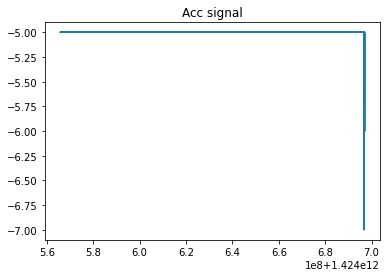

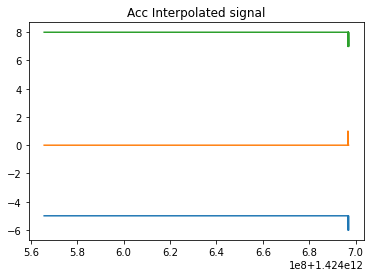

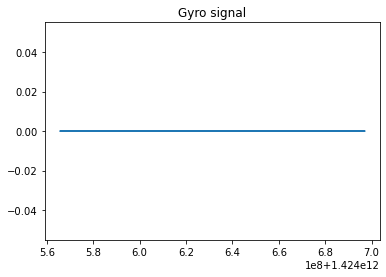

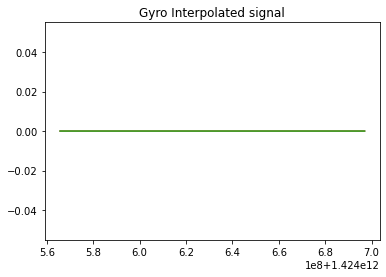

<Figure size 432x288 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt

time_interpolation = np.linspace(min_creation_time, max_creation_time, num=60000)
acc_timestamp = np.array(acc_df_example['Creation_Time']).astype(int)
x_acc = np.array(acc_df_example['x']).astype(int)
y_acc = np.array(acc_df_example['y']).astype(int)
z_acc = np.array(acc_df_example['z']).astype(int)
x_interpolated_acc = np.interp(time_interpolation, acc_timestamp, x_acc)
y_interpolated_acc = np.interp(time_interpolation, acc_timestamp, y_acc)
z_interpolated_acc = np.interp(time_interpolation, acc_timestamp, z_acc)

intepolated_acc = np.vstack((x_interpolated_acc, y_interpolated_acc, z_interpolated_acc)).T

gyro_timestamp = np.array(gyro_df_example['Creation_Time']).astype(int)
x_gyro = np.array(gyro_df_example['x']).astype(int)
y_gyro = np.array(gyro_df_example['y']).astype(int)
z_gyro = np.array(gyro_df_example['z']).astype(int)

x_interpolated_gyro = np.interp(time_interpolation, gyro_timestamp, x_gyro)
y_interpolated_gyro = np.interp(time_interpolation, gyro_timestamp, y_gyro)
z_interpolated_gyro = np.interp(time_interpolation, gyro_timestamp, z_gyro)

intepolated_gyro = np.vstack((x_interpolated_gyro, y_interpolated_gyro, z_interpolated_gyro)).T

plt.plot(acc_timestamp, x_acc)
plt.title('Acc signal')
plt.figure()

plt.plot(time_interpolation, intepolated_acc)
plt.title('Acc Interpolated signal')
plt.figure()

plt.plot(gyro_timestamp, x_gyro)
plt.title('Gyro signal')
plt.figure()

plt.plot(time_interpolation, intepolated_gyro)
plt.title('Gyro Interpolated signal')
plt.figure()


In [ ]:
for user in users:
    for device in devices:
        for activity in activities:

            #EXTRACTING ACTIVITY DATA
            df = acc_data.loc[(acc_data['User'] == users[0]) & (acc_data['Device'] == devices[0]) & (acc_data['gt'] == activities[0])]


In [ ]:

# Keep 20% of the data out for validation
### START CODE HERE ### (1 line)
train_reference_df, val_reference_df = train_test_split(reference_df, test_size=0.2, shuffle=True, random_state=123)
### END CODE HERE ###


def print_dataset_statistics(train_reference_df, val_reference_df):

    # Count the elements in the sets
    num_train_data_no_activity = sum(train_reference_df['NO_ACTIVITY'] == 1)
    num_train_data_walking   = sum(train_reference_df['WALKING'] == 1)
    num_train_data_driving = sum(train_reference_df['DRIVING'] == 1)
    num_train_data_bus = sum(train_reference_df['BUS'] == 1)
    num_train_data_bicycling = sum(train_reference_df['BICYCLING'] == 1)
    num_train_data_stairs = sum(train_reference_df['STAIRS'] == 1)
    num_train_data_elevator = sum(train_reference_df['ELEVATOR'] == 1)

    num_val_data_no_activity = sum(val_reference_df['NO_ACTIVITY'] == 1)
    num_val_data_walking   = sum(val_reference_df['WALKING'] == 1)
    num_val_data_driving = sum(val_reference_df['DRIVING'] == 1)
    num_val_data_bus = sum(val_reference_df['BUS'] == 1)
    num_val_data_bicycling   = sum(val_reference_df['BICYCLING'] == 1)
    num_val_data_stairs  = sum(val_reference_df['STAIRS'] == 1)
    num_val_data_elevator = sum(val_reference_df['ELEVATOR'] == 1)



    print('TRAIN SET')
    print('\tNo activity: {} ({:.2f}%)'.format(num_train_data_no_activity, 100 * num_train_data_no_activity / len(train_reference_df)))
    print('\tWalking: {} ({:.2f}%)'.format(num_train_data_walking, 100 * num_train_data_walking / len(train_reference_df)))
    print('\tDriving: {} ({:.2f}%)'.format(num_train_data_driving, 100 * num_train_data_driving / len(train_reference_df)))
    print('\tBus: {} ({:.2f}%)'.format(num_train_data_bus, 100 * num_train_data_bus / len(train_reference_df)))
    print('\tBicycling: {} ({:.2f}%)'.format(num_train_data_bicycling, 100 * num_train_data_bicycling / len(train_reference_df)))
    print('\tStairs: {} ({:.2f}%)'.format(num_train_data_stairs, 100 * num_train_data_stairs / len(train_reference_df)))
    print('\tElevator: {} ({:.2f}%)'.format(num_train_data_elevator, 100 * num_train_data_elevator / len(train_reference_df)))


    print('VALIDATION SET')
    print('\tNo activity: {} ({:.2f}%)'.format(num_val_data_no_activity, 100 * num_val_data_no_activity / len(val_reference_df)))
    print('\tWalking: {} ({:.2f}%)'.format(num_val_data_walking, 100 * num_val_data_walking / len(val_reference_df)))
    print('\tDriving: {} ({:.2f}%)'.format(num_val_data_driving, 100 * num_val_data_driving / len(val_reference_df)))
    print('\tBus: {} ({:.2f}%)'.format(num_val_data_bus, 100 * num_val_data_bus / len(val_reference_df)))
    print('\tBicycling: {} ({:.2f}%)'.format(num_val_data_bicycling, 100 * num_val_data_bicycling / len(val_reference_df)))
    print('\tStairs: {} ({:.2f}%)'.format(num_val_data_stairs, 100 * num_val_data_stairs / len(val_reference_df)))
    print('\tElevator: {} ({:.2f}%)'.format(num_val_data_elevator, 100 * num_val_data_elevator / len(val_reference_df)))


print_dataset_statistics(train_reference_df, val_reference_df)